In [2]:
import requests
import pandas as pd
import numpy as np


In [ ]:
import requests
import pandas as pd

# CoinGecko API URL
BASE_URL = 'https://api.coingecko.com/api/v3'

# Function to fetch market data for multiple cryptocurrencies
def fetch_multiple_coins(crypto_ids=["bitcoin", "ethereum", "litecoin"], vs_currency="usd", days=30):
    all_data = []  # To store all the data for different cryptocurrencies
    
    for crypto_id in crypto_ids:
        url = f"{BASE_URL}/coins/{crypto_id}/market_chart"
        params = {
            'vs_currency': vs_currency,  # Currency to fetch data in (USD)
            'days': str(days)  # Number of days to fetch (e.g., 30)
        }
        
        # Make the request
        response = requests.get(url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            prices = data['prices']
            volumes = data['total_volumes']
            market_caps = data['market_caps']
            
            # Create a DataFrame for this coin
            df = pd.DataFrame(prices, columns=['timestamp', f'{crypto_id}_price'])
            df['volume'] = [vol[1] for vol in volumes]
            df['market_cap'] = [cap[1] for cap in market_caps]
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
            
            # Append data for this coin to the all_data list
            all_data.append(df)
        else:
            print(f"Error fetching data for {crypto_id}")
    
    # Combine all data into a single DataFrame
    combined_df = pd.concat(all_data, axis=1)
    return combined_df

# List of cryptocurrency IDs to fetch data for
crypto_ids = ["bitcoin", "ethereum", "litecoin"]

# Fetch data for the specified coins
dataset = fetch_multiple_coins(crypto_ids, vs_currency="usd", days=30)

# Display the combined dataset
print(dataset.head())

# Save the dataset to a CSV file (optional)
dataset.to_csv("multiple_cryptos_data.csv", index=False)


                timestamp  bitcoin_price        volume    market_cap  \
0 2025-10-04 20:01:19.612  121968.720522  3.775304e+10  2.429671e+12   
1 2025-10-04 21:02:04.831  121981.787913  3.624442e+10  2.431195e+12   
2 2025-10-04 22:02:01.545  122229.253628  3.623380e+10  2.435776e+12   
3 2025-10-04 23:01:59.170  122317.157204  3.580430e+10  2.438410e+12   
4 2025-10-05 00:01:39.347  122428.890634  3.484944e+10  2.438832e+12   

                timestamp  ethereum_price        volume    market_cap  \
0 2025-10-04 19:02:27.438     4452.567767  2.354550e+10  5.378883e+11   
1 2025-10-04 20:02:51.781     4468.097675  2.214067e+10  5.392239e+11   
2 2025-10-04 21:02:04.113     4477.481351  2.124868e+10  5.405342e+11   
3 2025-10-04 22:02:02.091     4486.272636  2.134110e+10  5.414765e+11   
4 2025-10-04 23:02:21.137     4491.457627  2.109189e+10  5.420705e+11   

                timestamp  litecoin_price        volume    market_cap  
0 2025-10-04 20:03:23.003      118.932041  5.356362e+08 

In [32]:
df = pd.read_csv('multiple_cryptos_data.csv')
df

,timestamp,bitcoin_price,volume,market_cap,timestamp.1,ethereum_price,volume.1,market_cap.1,timestamp.2,litecoin_price,volume.2,market_cap.2
0,2025-10-04 20:01:19.612,121968.720522,3.775304e+10,2.429671e+12,2025-10-04 19:02:27.438,4452.567767,2.354550e+10,5.378883e+11,2025-10-04 20:03:23.003,118.932041,5.356362e+08,9.084779e+09
1,2025-10-04 21:02:04.831,121981.787913,3.624442e+10,2.431195e+12,2025-10-04 20:02:51.781,4468.097675,2.214067e+10,5.392239e+11,2025-10-04 21:02:04.035,119.088900,5.135156e+08,9.094045e+09
2,2025-10-04 22:02:01.545,122229.253628,3.623380e+10,2.435776e+12,2025-10-04 21:02:04.113,4477.481351,2.124868e+10,5.405342e+11,2025-10-04 22:01:30.844,119.478234,5.312872e+08,9.121780e+09
3,2025-10-04 23:01:59.170,122317.157204,3.580430e+10,2.438410e+12,2025-10-04 22:02:02.091,4486.272636,2.134110e+10,5.414765e+11,2025-10-04 23:01:24.421,120.021036,4.872463e+08,9.163742e+09
4,2025-10-05 00:01:39.347,122428.890634,3.484944e+10,2.438832e+12,2025-10-04 23:02:21.137,4491.457627,2.109189e+10,5.420705e+11,2025-10-05 00:01:24.255,120.498317,5.125387e+08,9.196556e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
716,2025-11-03 16:00:35.420,105802.323890,5.683415e+10,2.110213e+12,2025-11-03 15:01:57.959,3727.707381,3.319158e+10,4.499507e+11,2025-11-03 16:00:34.510,87.848051,7.845721e+08,6.724084e+09
717,2025-11-03 17:02:30.929,106575.486921,6.241378e+10,2.126002e+12,2025-11-03 16:00:42.919,3591.421883,3.823790e+10,4.340991e+11,2025-11-03 17:01:16.966,88.386341,8.424765e+08,6.767772e+09
718,2025-11-03 18:07:39.623,107516.838811,6.618836e+10,2.141422e+12,2025-11-03 17:02:15.056,3613.385942,4.044882e+10,4.362144e+11,2025-11-03 18:02:56.214,89.652859,8.737397e+08,6.856561e+09
719,2025-11-03 19:01:06.835,106990.156886,6.888377e+10,2.133297e+12,2025-11-03 18:07:38.341,3669.935936,4.276136e+10,4.423984e+11,2025-11-03 19:01:02.751,88.795291,8.643223e+08,6.794492e+09


In [33]:
# Convert to datetime if not already
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['timestamp.1'] = pd.to_datetime(df['timestamp.1'], errors='coerce')
df['timestamp.2'] = pd.to_datetime(df['timestamp.2'], errors='coerce')




In [34]:
df.rename(columns={
    "timestamp":"bitcoin_date",
    "market_cap": "market_cap_bitcoin",
    "timestamp.1": "ethereum_date",
    "volume.1": "ethereum_volume",
    "market_cap.1":"market_cap_etereum",
    "timestamp.2" : "litecoin_date",
    "volume.2" :"litecoin_volume",
    "market_cap.2": "market_cap_litecoin",
    "volume": "bitcoin_volume"
}, inplace=True
)

array([[<Axes: title={'center': 'bitcoin_date'}>,
        <Axes: title={'center': 'bitcoin_price'}>,
        <Axes: title={'center': 'bitcoin_volume'}>],
       [<Axes: title={'center': 'market_cap_bitcoin'}>,
        <Axes: title={'center': 'ethereum_date'}>,
        <Axes: title={'center': 'ethereum_price'}>],
       [<Axes: title={'center': 'ethereum_volume'}>,
        <Axes: title={'center': 'market_cap_etereum'}>,
        <Axes: title={'center': 'litecoin_date'}>],
       [<Axes: title={'center': 'litecoin_price'}>,
        <Axes: title={'center': 'litecoin_volume'}>,
        <Axes: title={'center': 'market_cap_litecoin'}>]], dtype=object)

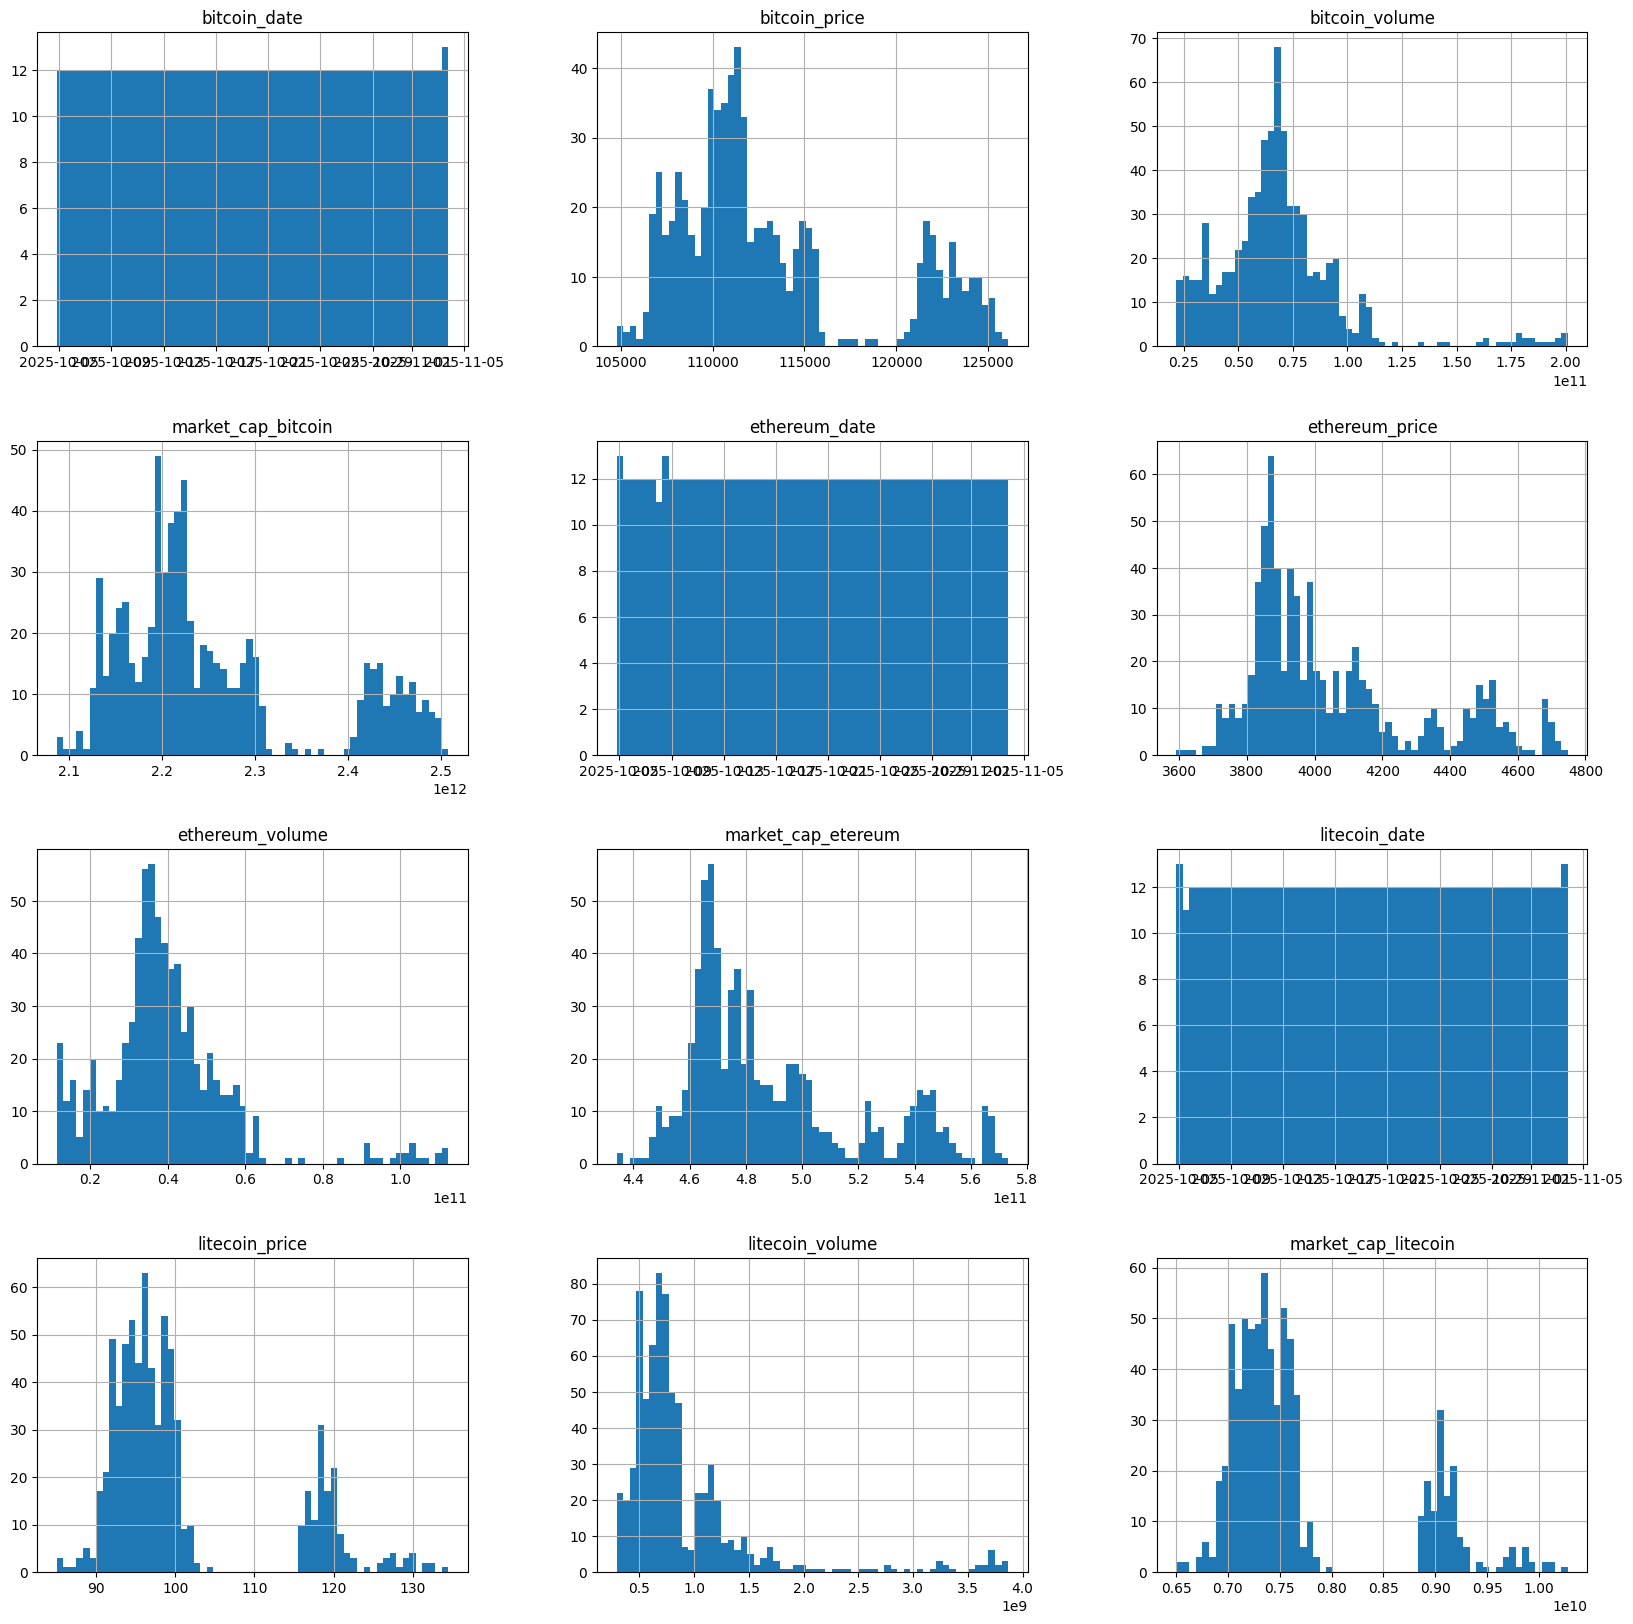

In [35]:
df.hist(bins = 60, figsize=(20,20))

In [36]:
df.dtypes

bitcoin_date           datetime64[ns]
bitcoin_price                 float64
bitcoin_volume                float64
market_cap_bitcoin            float64
ethereum_date          datetime64[ns]
ethereum_price                float64
ethereum_volume               float64
market_cap_etereum            float64
litecoin_date          datetime64[ns]
litecoin_price                float64
litecoin_volume               float64
market_cap_litecoin           float64
dtype: object

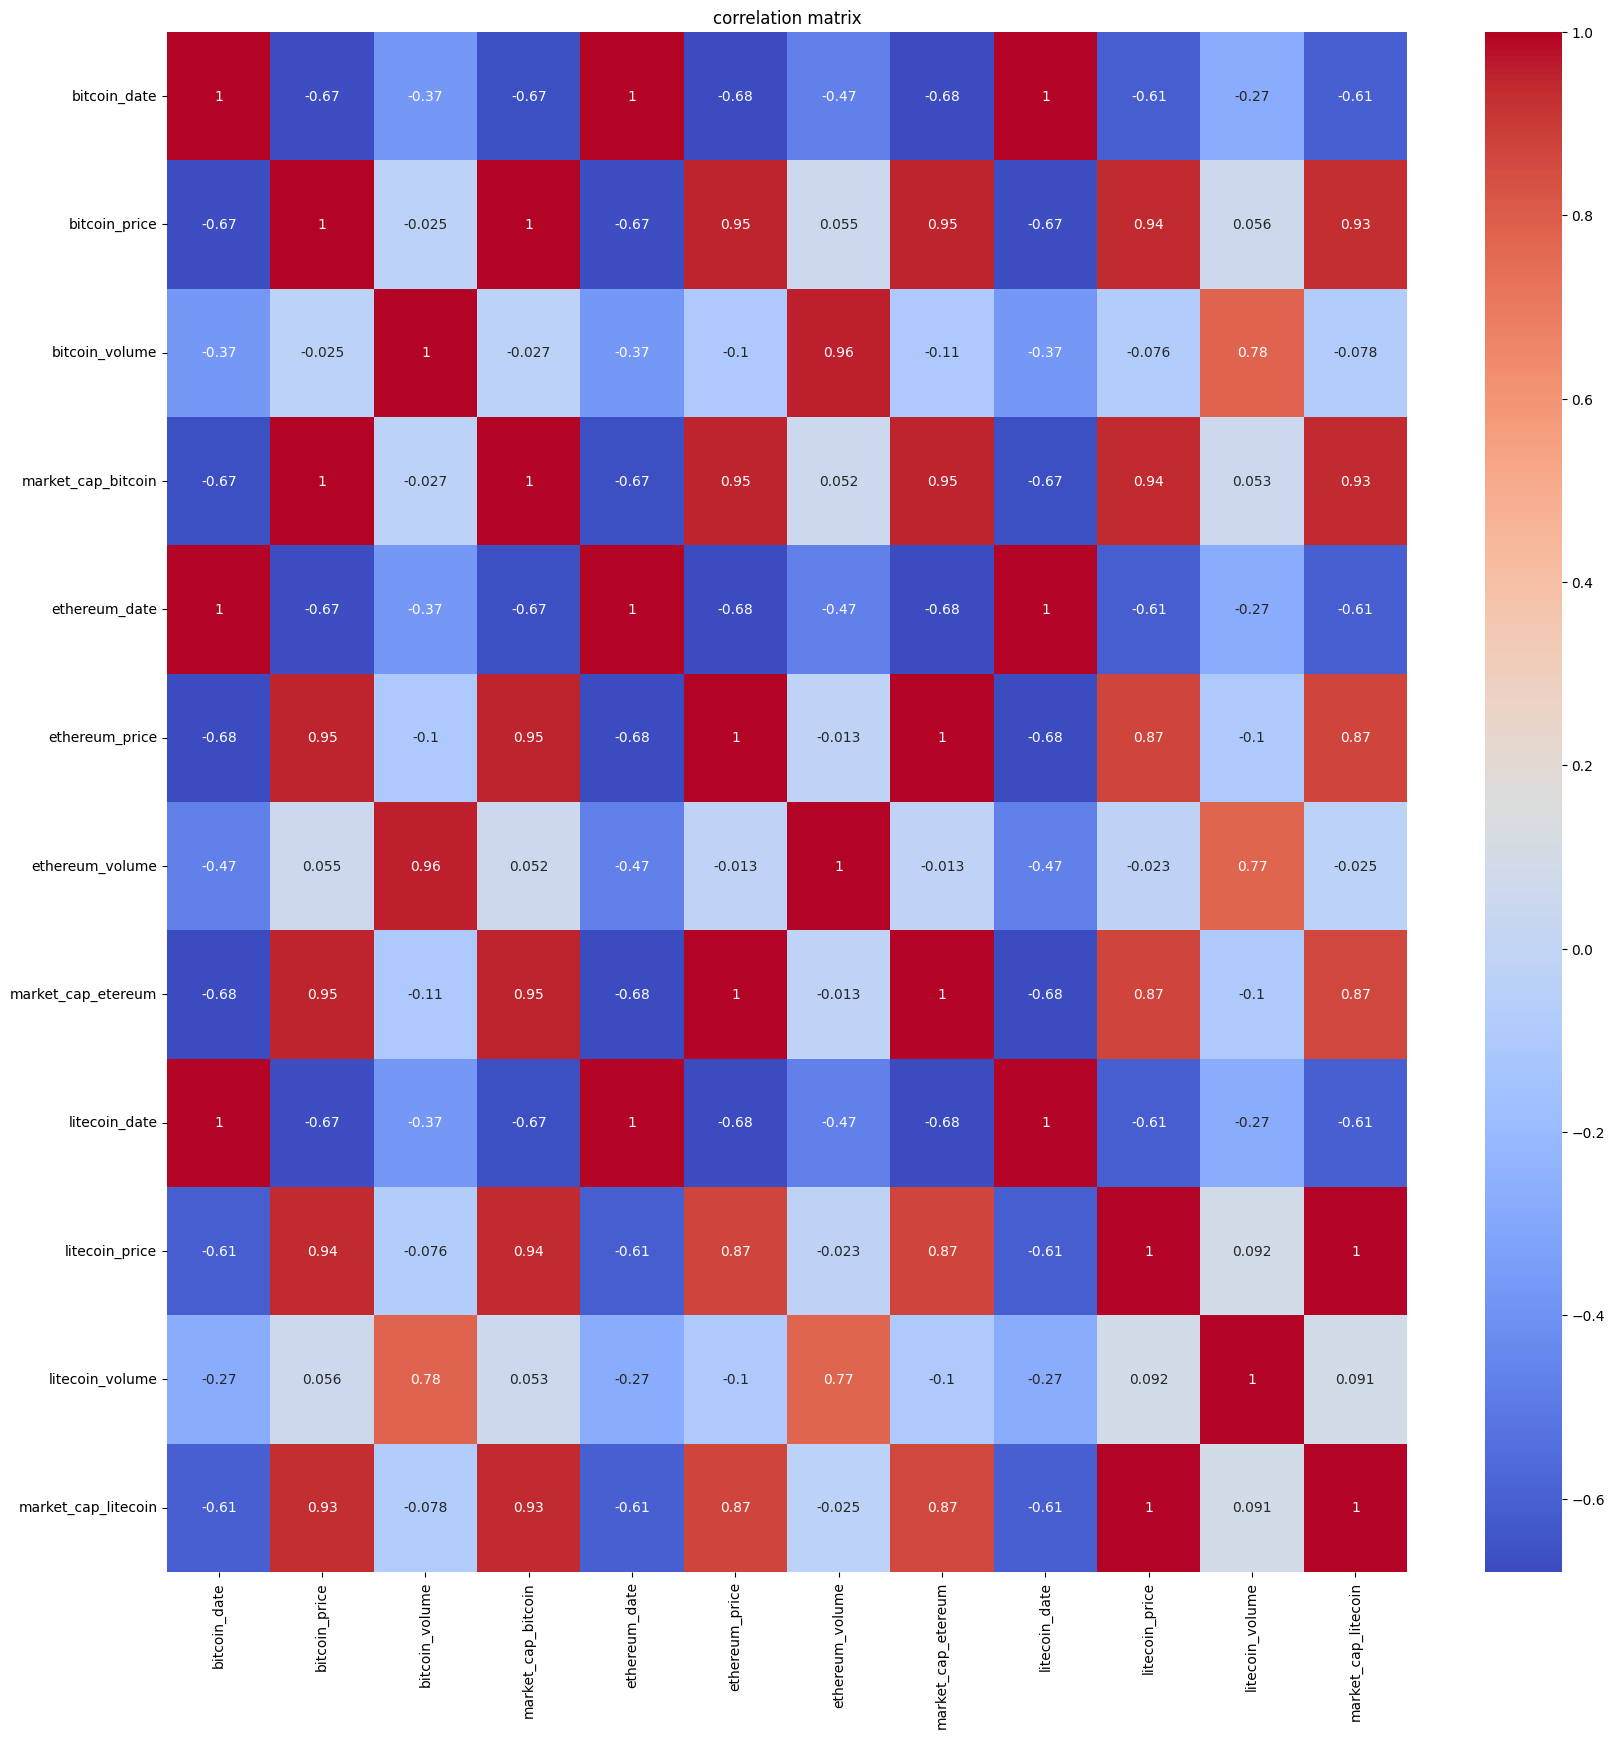

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(
    df.corr(),
    annot = True,
    cmap = 'coolwarm'
)
plt.title("correlation matrix")
plt.show()

In [40]:
# df = df.drop(columns=['bitcoin_date', 'ethereum_date', 'litecoin_date'])
df = df.drop(columns=['market_cap_bitcoin', 'market_cap_etereum', 'market_cap_litecoin'])



array([[<Axes: title={'center': 'bitcoin_price'}>,
        <Axes: title={'center': 'bitcoin_volume'}>],
       [<Axes: title={'center': 'ethereum_price'}>,
        <Axes: title={'center': 'ethereum_volume'}>],
       [<Axes: title={'center': 'litecoin_price'}>,
        <Axes: title={'center': 'litecoin_volume'}>]], dtype=object)

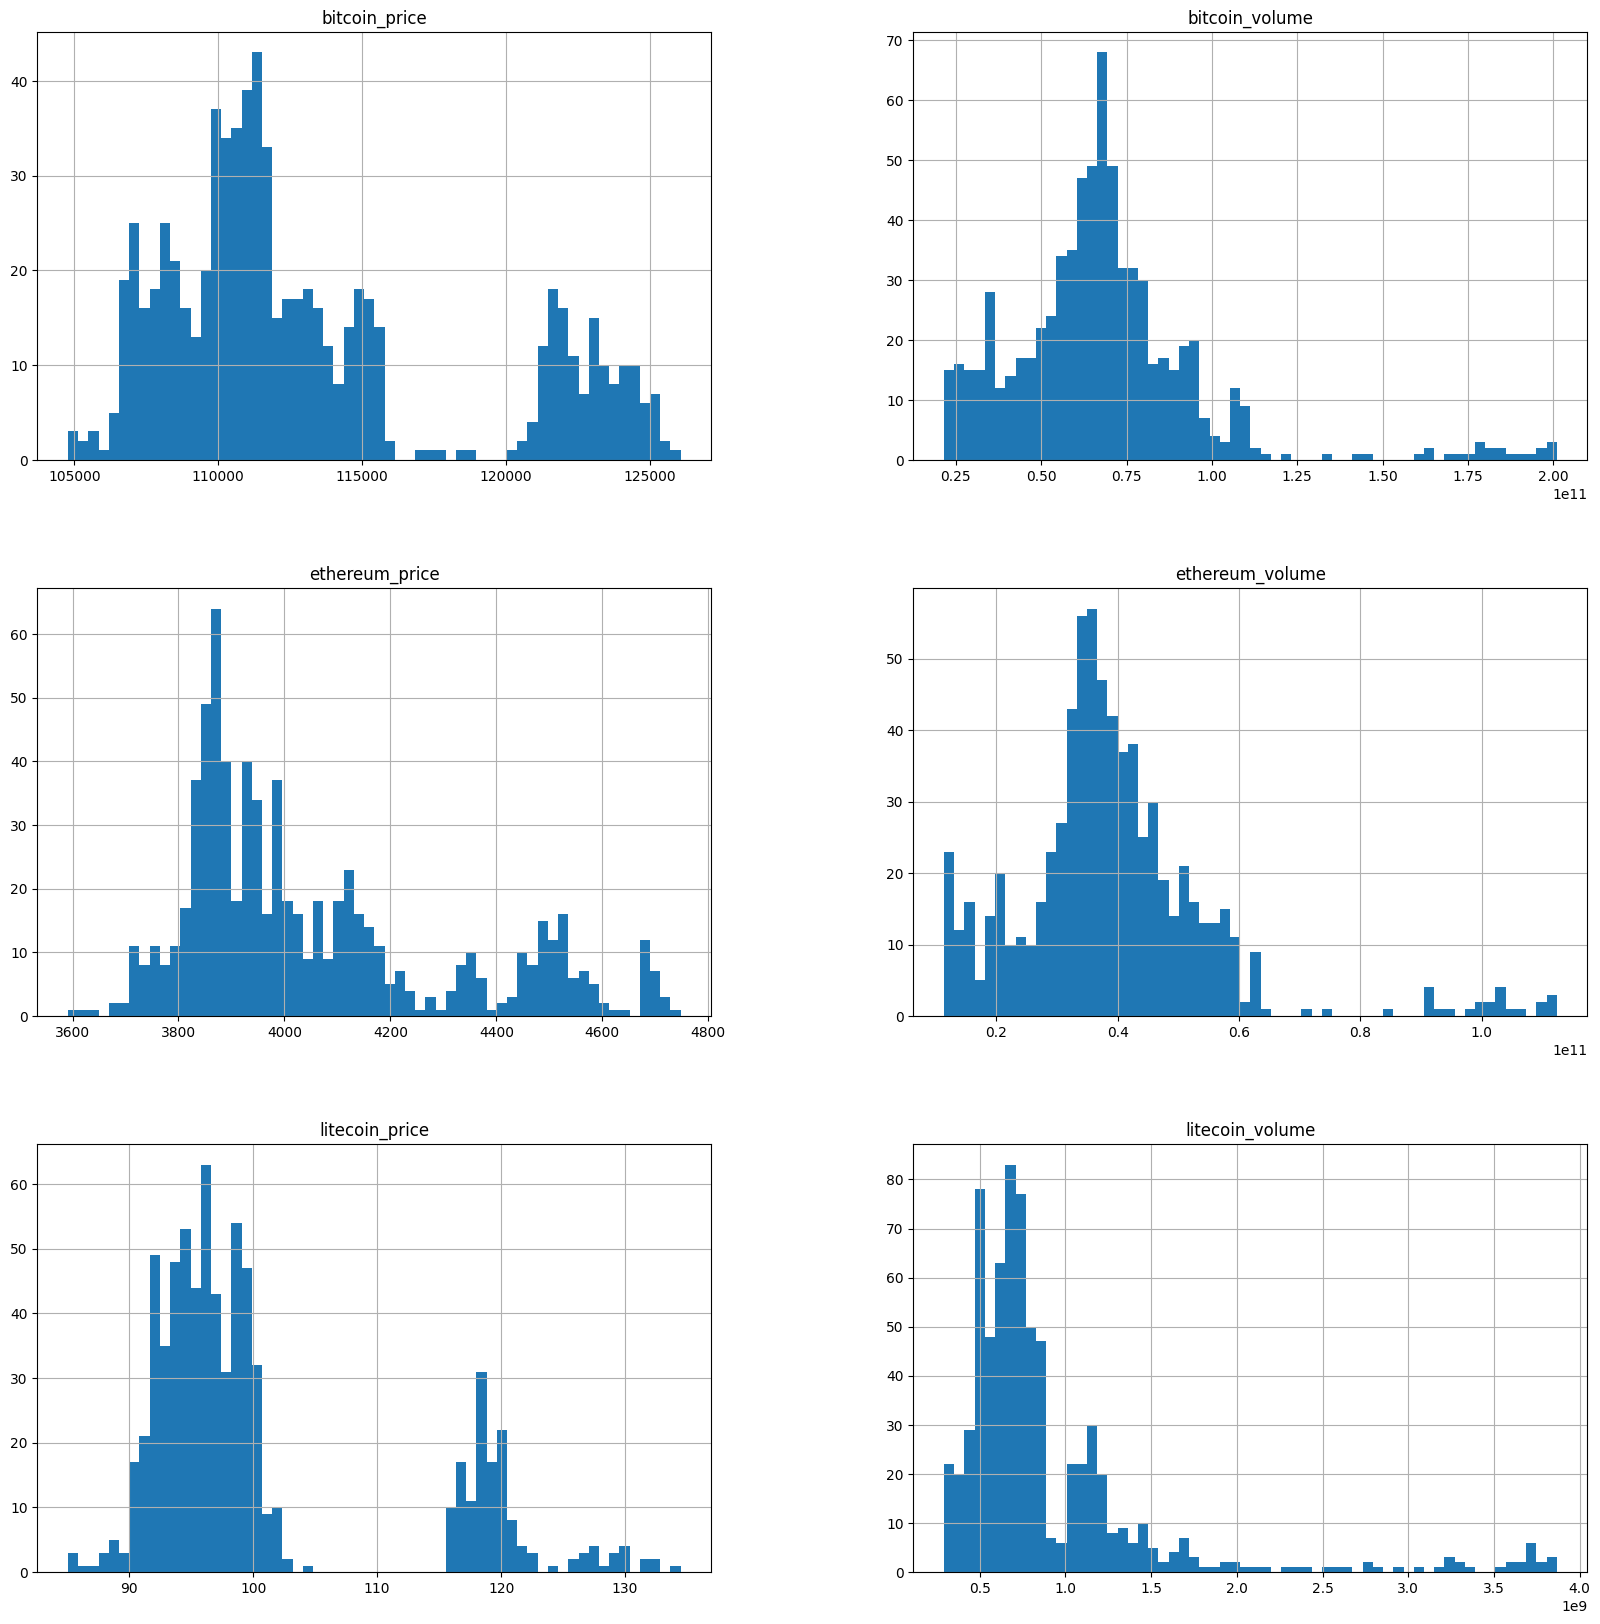

In [41]:
df.hist(bins=60, figsize=(20,20))

In [42]:
df['bitcoin_return'] = df['bitcoin_price'].pct_change()
df['ethereum_return'] = df['ethereum_price'].pct_change()
df['litecoin_return'] = df['litecoin_price'].pct_change()



array([[<Axes: title={'center': 'bitcoin_price'}>,
        <Axes: title={'center': 'bitcoin_volume'}>,
        <Axes: title={'center': 'ethereum_price'}>],
       [<Axes: title={'center': 'ethereum_volume'}>,
        <Axes: title={'center': 'litecoin_price'}>,
        <Axes: title={'center': 'litecoin_volume'}>],
       [<Axes: title={'center': 'bitcoin_return'}>,
        <Axes: title={'center': 'ethereum_return'}>,
        <Axes: title={'center': 'litecoin_return'}>]], dtype=object)

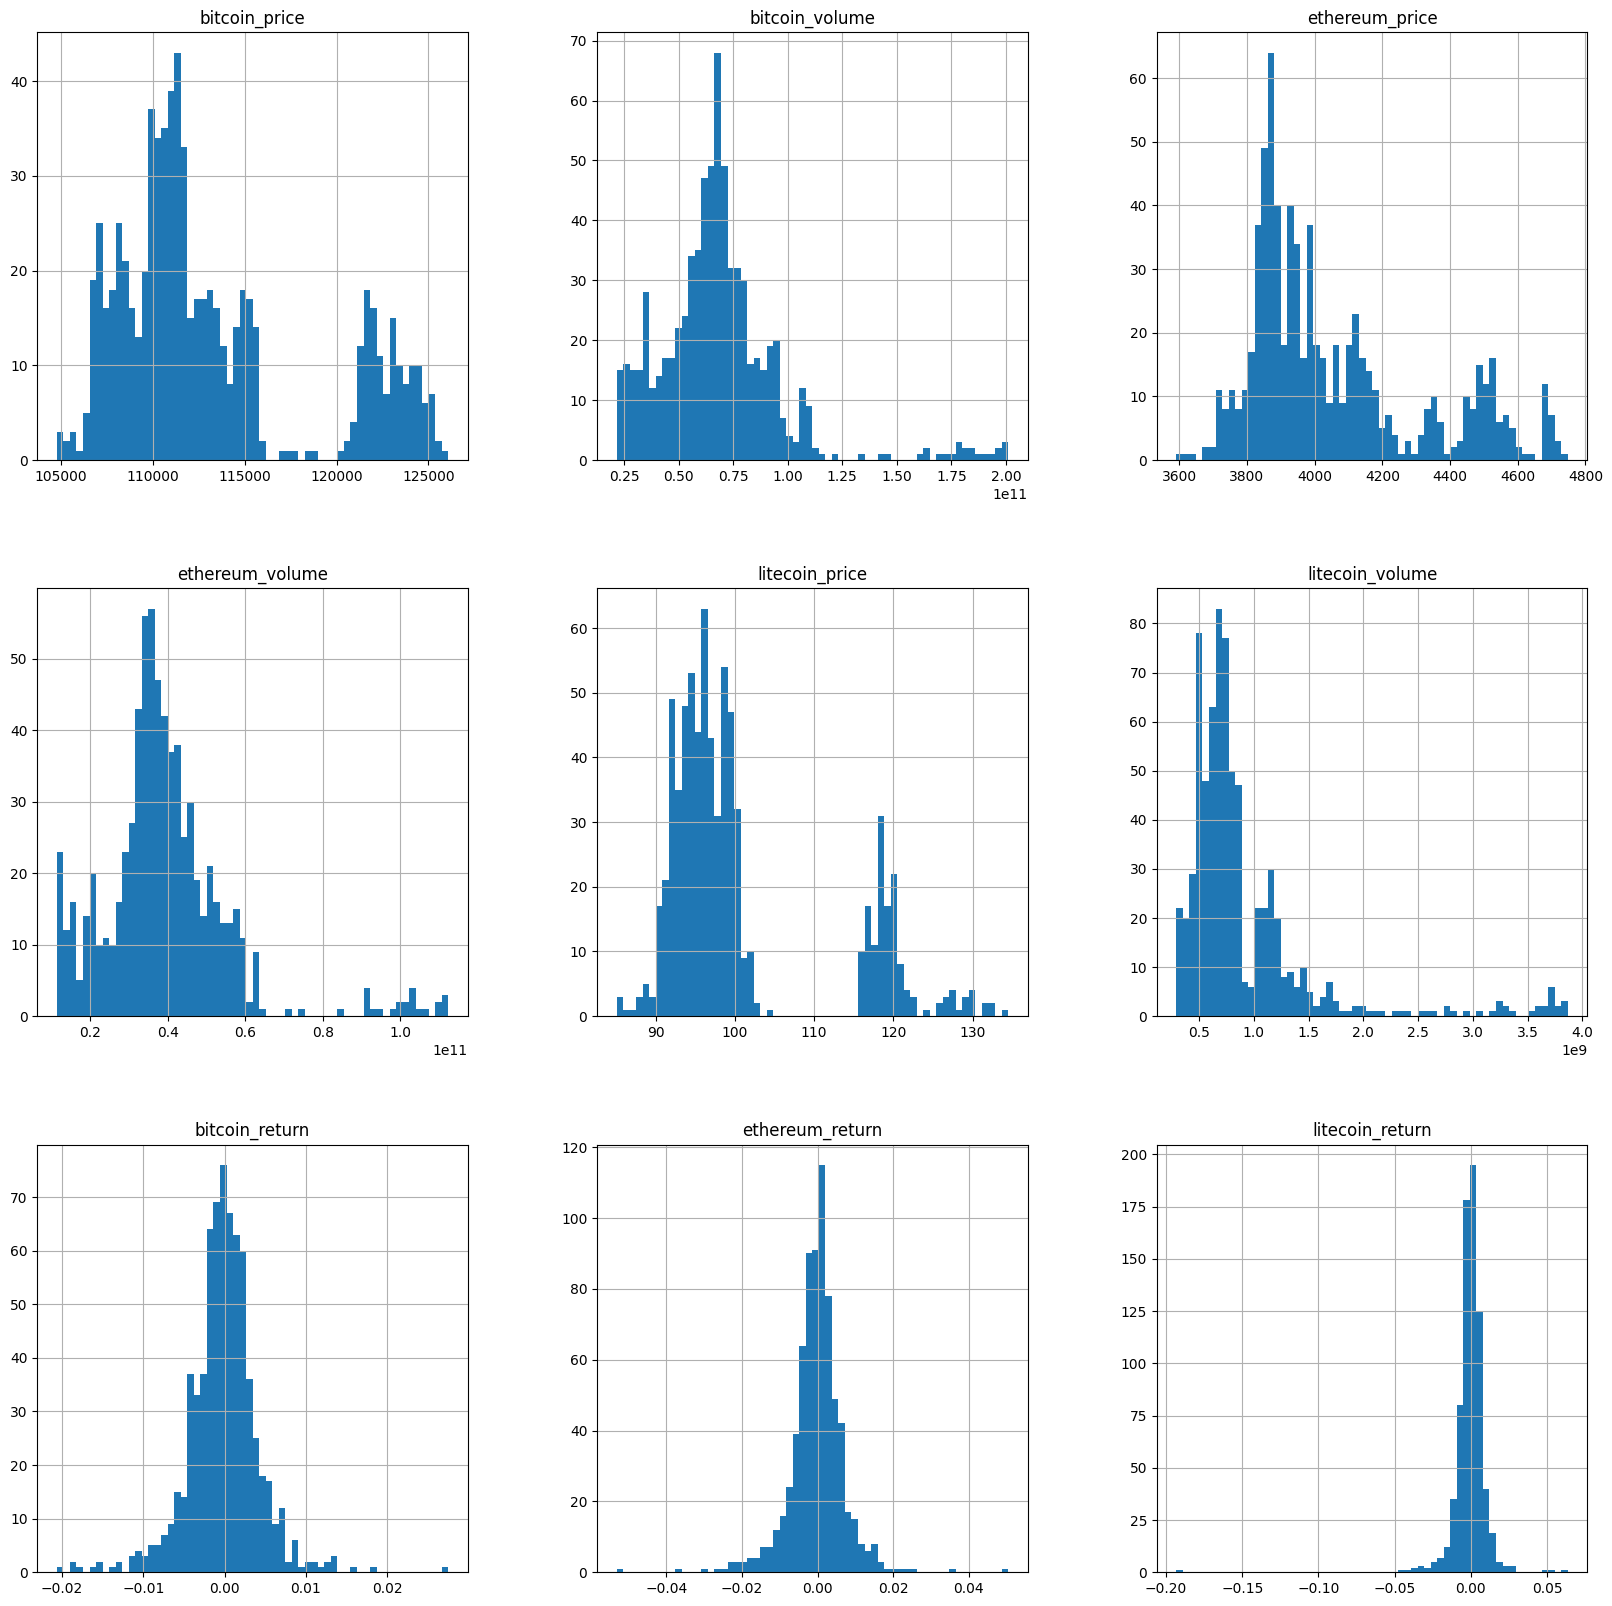

In [43]:
df.hist(bins=60, figsize=(20,20))

<Axes: >

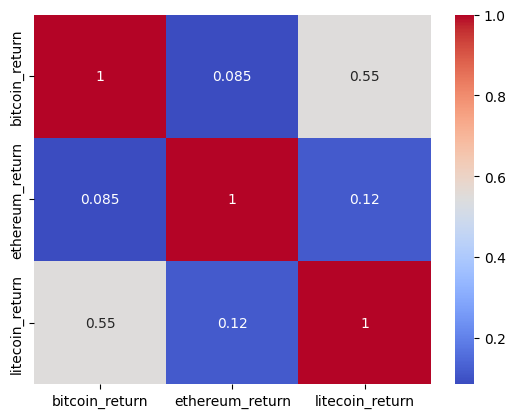

In [44]:
corr = df[['bitcoin_return', 'ethereum_return', 'litecoin_return']].corr()

sns.heatmap(
corr,
annot=True, 
cmap='coolwarm'
)

In [45]:
df = df[~df.index.duplicated(keep='first')]


In [46]:
df.dtypes

bitcoin_price      float64
bitcoin_volume     float64
ethereum_price     float64
ethereum_volume    float64
litecoin_price     float64
litecoin_volume    float64
bitcoin_return     float64
ethereum_return    float64
litecoin_return    float64
dtype: object

In [47]:
import numpy as np

for col in ['bitcoin_volume', 'ethereum_volume', 'litecoin_volume']:
    df[f'log_{col}'] = np.log1p(df[col])  # log1p handles zeros safely


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df_scaled = pd.DataFrame(scaled, columns=df.select_dtypes(include=['float64', 'int64']).columns, index=df.index)


In [49]:
# Rolling Averages / Moving Averages
df['bitcoin_ma7'] = df['bitcoin_price'].rolling(window=7).mean()
df['ethereum_ma7'] = df['ethereum_price'].rolling(window=7).mean()
df['litecoin_ma7'] = df['litecoin_price'].rolling(window=7).mean()
df['bitcoin_ma30'] = df['bitcoin_price'].rolling(window=30).mean()
df['ethereum_ma30'] = df['ethereum_price'].rolling(window=30).mean()
df['litecoin_ma30'] = df['litecoin_price'].rolling(window=30).mean()


In [50]:
df['bitcoin_volatility'] = df['bitcoin_return'].rolling(window=7).std()
df['ethereum_volatility'] = df['ethereum_return'].rolling(window=7).std()
df['litecoin_volatility'] = df['litecoin_return'].rolling(window=7).std()


In [51]:
df['bitcoin_return_lag1'] = df['bitcoin_return'].shift(1)
df['ethereum_return_lag1'] = df['ethereum_return'].shift(1)
df['litecoin_return_lag1'] = df['litecoin_return'].shift(1)


In [52]:
df.describe()

,bitcoin_price,bitcoin_volume,ethereum_price,ethereum_volume,litecoin_price,litecoin_volume,bitcoin_return,ethereum_return,litecoin_return,log_bitcoin_volume,...,litecoin_ma7,bitcoin_ma30,ethereum_ma30,litecoin_ma30,bitcoin_volatility,ethereum_volatility,litecoin_volatility,bitcoin_return_lag1,ethereum_return_lag1,litecoin_return_lag1
count,721.000000,7.210000e+02,721.000000,7.210000e+02,721.000000,7.210000e+02,720.000000,720.000000,720.000000,721.000000,...,715.000000,692.000000,692.000000,692.000000,714.000000,714.000000,714.000000,719.000000,719.000000,719.000000
mean,113161.501426,6.811190e+10,4053.553750,3.904666e+10,100.691571,9.059698e+08,-0.000174,-0.000255,-0.000345,24.864732,...,100.662632,113063.895433,4050.727317,100.446176,0.003842,0.006242,0.007897,-0.000172,-0.000242,-0.000338
std,5343.092656,2.869555e+10,255.060517,1.628519e+10,10.453856,6.272565e+08,0.004453,0.007363,0.011391,0.402721,...,10.295523,5052.251369,235.539389,9.686811,0.002063,0.003554,0.007972,0.004456,0.007360,0.011397
min,104777.543920,2.157551e+10,3591.421883,1.137975e+10,85.058032,2.918631e+08,-0.020622,-0.053152,-0.193266,23.794825,...,86.749272,106436.638460,3771.328260,89.672137,0.000724,0.001155,0.001262,-0.020622,-0.053152,-0.193266
25%,109635.308404,5.264031e+10,3868.096270,3.097475e+10,94.018088,5.691734e+08,-0.002209,-0.003317,-0.003860,24.686748,...,94.059801,109659.638538,3874.598145,94.214033,0.002372,0.003697,0.004173,-0.002213,-0.003303,-0.003851
50%,111424.093137,6.644247e+10,3963.718058,3.730716e+10,96.828924,7.201370e+08,-0.000096,0.000110,0.000022,24.919602,...,96.879698,111505.761926,3967.558830,96.718580,0.003440,0.005485,0.006102,-0.000090,0.000113,0.000030
75%,115047.923170,7.830033e+10,4160.136609,4.517579e+10,100.326419,1.040498e+09,0.002073,0.003193,0.004107,25.083818,...,100.219697,114638.543503,4131.355234,99.954981,0.004902,0.007574,0.009003,0.002074,0.003219,0.004108
max,126079.887029,2.009687e+11,4747.834071,1.123582e+11,134.477510,3.865938e+09,0.027499,0.050358,0.063679,26.026415,...,131.471580,124613.344597,4671.978737,126.335402,0.013861,0.021096,0.078254,0.027499,0.050358,0.063679


In [54]:
df.isna().sum()

bitcoin_price            0
bitcoin_volume           0
ethereum_price           0
ethereum_volume          0
litecoin_price           0
litecoin_volume          0
bitcoin_return           1
ethereum_return          1
litecoin_return          1
log_bitcoin_volume       0
log_ethereum_volume      0
log_litecoin_volume      0
bitcoin_ma7              6
ethereum_ma7             6
litecoin_ma7             6
bitcoin_ma30            29
ethereum_ma30           29
litecoin_ma30           29
bitcoin_volatility       7
ethereum_volatility      7
litecoin_volatility      7
bitcoin_return_lag1      2
ethereum_return_lag1     2
litecoin_return_lag1     2
dtype: int64

array([[<Axes: title={'center': 'bitcoin_price'}>,
        <Axes: title={'center': 'bitcoin_volume'}>,
        <Axes: title={'center': 'ethereum_price'}>,
        <Axes: title={'center': 'ethereum_volume'}>,
        <Axes: title={'center': 'litecoin_price'}>],
       [<Axes: title={'center': 'litecoin_volume'}>,
        <Axes: title={'center': 'bitcoin_return'}>,
        <Axes: title={'center': 'ethereum_return'}>,
        <Axes: title={'center': 'litecoin_return'}>,
        <Axes: title={'center': 'log_bitcoin_volume'}>],
       [<Axes: title={'center': 'log_ethereum_volume'}>,
        <Axes: title={'center': 'log_litecoin_volume'}>,
        <Axes: title={'center': 'bitcoin_ma7'}>,
        <Axes: title={'center': 'ethereum_ma7'}>,
        <Axes: title={'center': 'litecoin_ma7'}>],
       [<Axes: title={'center': 'bitcoin_ma30'}>,
        <Axes: title={'center': 'ethereum_ma30'}>,
        <Axes: title={'center': 'litecoin_ma30'}>,
        <Axes: title={'center': 'bitcoin_volatility'}>,

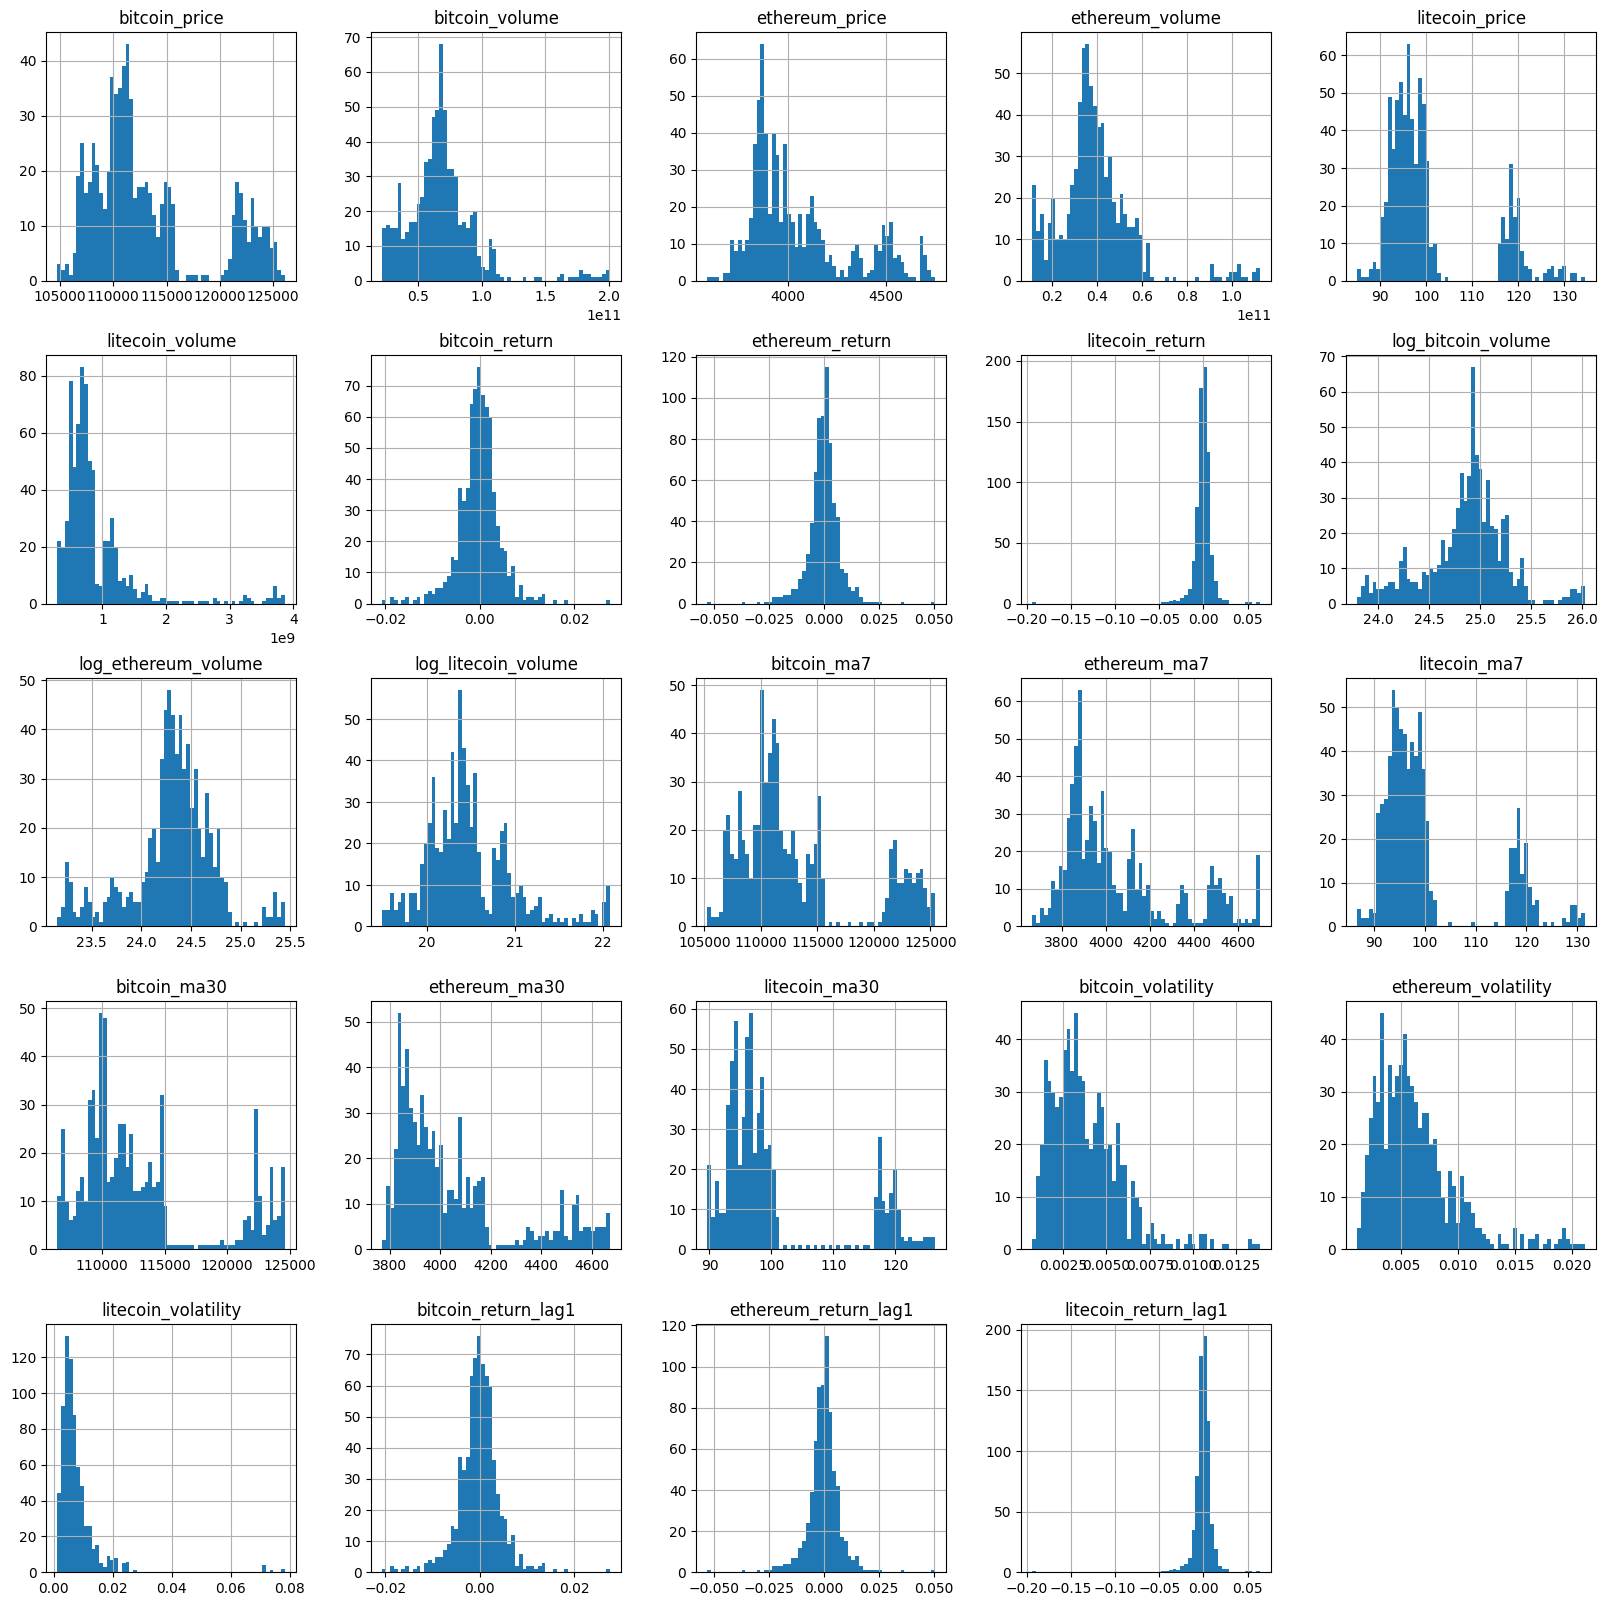

In [55]:
df.hist(bins=60, figsize=(20,20))

In [56]:
df

,bitcoin_price,bitcoin_volume,ethereum_price,ethereum_volume,litecoin_price,litecoin_volume,bitcoin_return,ethereum_return,litecoin_return,log_bitcoin_volume,...,litecoin_ma7,bitcoin_ma30,ethereum_ma30,litecoin_ma30,bitcoin_volatility,ethereum_volatility,litecoin_volatility,bitcoin_return_lag1,ethereum_return_lag1,litecoin_return_lag1
0,121968.720522,3.775304e+10,4452.567767,2.354550e+10,118.932041,5.356362e+08,NaN,NaN,NaN,24.354332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,121981.787913,3.624442e+10,4468.097675,2.214067e+10,119.088900,5.135156e+08,0.000107,0.003488,0.001319,24.313551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122229.253628,3.623380e+10,4477.481351,2.124868e+10,119.478234,5.312872e+08,0.002029,0.002100,0.003269,24.313258,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000107,0.003488,0.001319
3,122317.157204,3.580430e+10,4486.272636,2.134110e+10,120.021036,4.872463e+08,0.000719,0.001963,0.004543,24.301334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002029,0.002100,0.003269
4,122428.890634,3.484944e+10,4491.457627,2.109189e+10,120.498317,5.125387e+08,0.000913,0.001156,0.003977,24.274303,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000719,0.001963,0.004543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,105802.323890,5.683415e+10,3727.707381,3.319158e+10,87.848051,7.845721e+08,-0.020622,0.001469,-0.045432,24.763403,...,91.449441,109017.314218,3804.253333,96.027523,0.008513,0.002332,0.016723,0.000339,0.002389,-0.000115
717,106575.486921,6.241378e+10,3591.421883,3.823790e+10,88.386341,8.424765e+08,0.007308,-0.036560,0.006128,24.857052,...,90.850844,108890.113058,3794.904644,95.641505,0.009190,0.014274,0.017604,-0.020622,0.001469,-0.045432
718,107516.838811,6.618836e+10,3613.385942,4.044882e+10,89.652859,8.737397e+08,0.008833,0.006116,0.014329,24.915770,...,90.497294,108772.086087,3786.705422,95.269731,0.009876,0.014847,0.019307,0.007308,-0.036560,0.006128
719,106990.156886,6.888377e+10,3669.935936,4.276136e+10,88.795291,8.643223e+08,-0.004899,0.015650,-0.009565,24.955686,...,90.064550,108648.797139,3779.328758,94.882470,0.009802,0.016489,0.019429,0.008833,0.006116,0.014329


In [57]:
df['btc_eth_corr'] = df['bitcoin_return'].rolling(window=14).corr(df['ethereum_return'])
df['btc_ltc_corr'] = df['bitcoin_return'].rolling(window=14).corr(df['litecoin_return'])
df['ltc_eth_corr'] = df['litecoin_return'].rolling(window=14).corr(df['ethereum_return'])


array([[<Axes: title={'center': 'bitcoin_price'}>,
        <Axes: title={'center': 'bitcoin_volume'}>,
        <Axes: title={'center': 'ethereum_price'}>,
        <Axes: title={'center': 'ethereum_volume'}>,
        <Axes: title={'center': 'litecoin_price'}>],
       [<Axes: title={'center': 'litecoin_volume'}>,
        <Axes: title={'center': 'bitcoin_return'}>,
        <Axes: title={'center': 'ethereum_return'}>,
        <Axes: title={'center': 'litecoin_return'}>,
        <Axes: title={'center': 'log_bitcoin_volume'}>],
       [<Axes: title={'center': 'log_ethereum_volume'}>,
        <Axes: title={'center': 'log_litecoin_volume'}>,
        <Axes: title={'center': 'bitcoin_ma7'}>,
        <Axes: title={'center': 'ethereum_ma7'}>,
        <Axes: title={'center': 'litecoin_ma7'}>],
       [<Axes: title={'center': 'bitcoin_ma30'}>,
        <Axes: title={'center': 'ethereum_ma30'}>,
        <Axes: title={'center': 'litecoin_ma30'}>,
        <Axes: title={'center': 'bitcoin_volatility'}>,

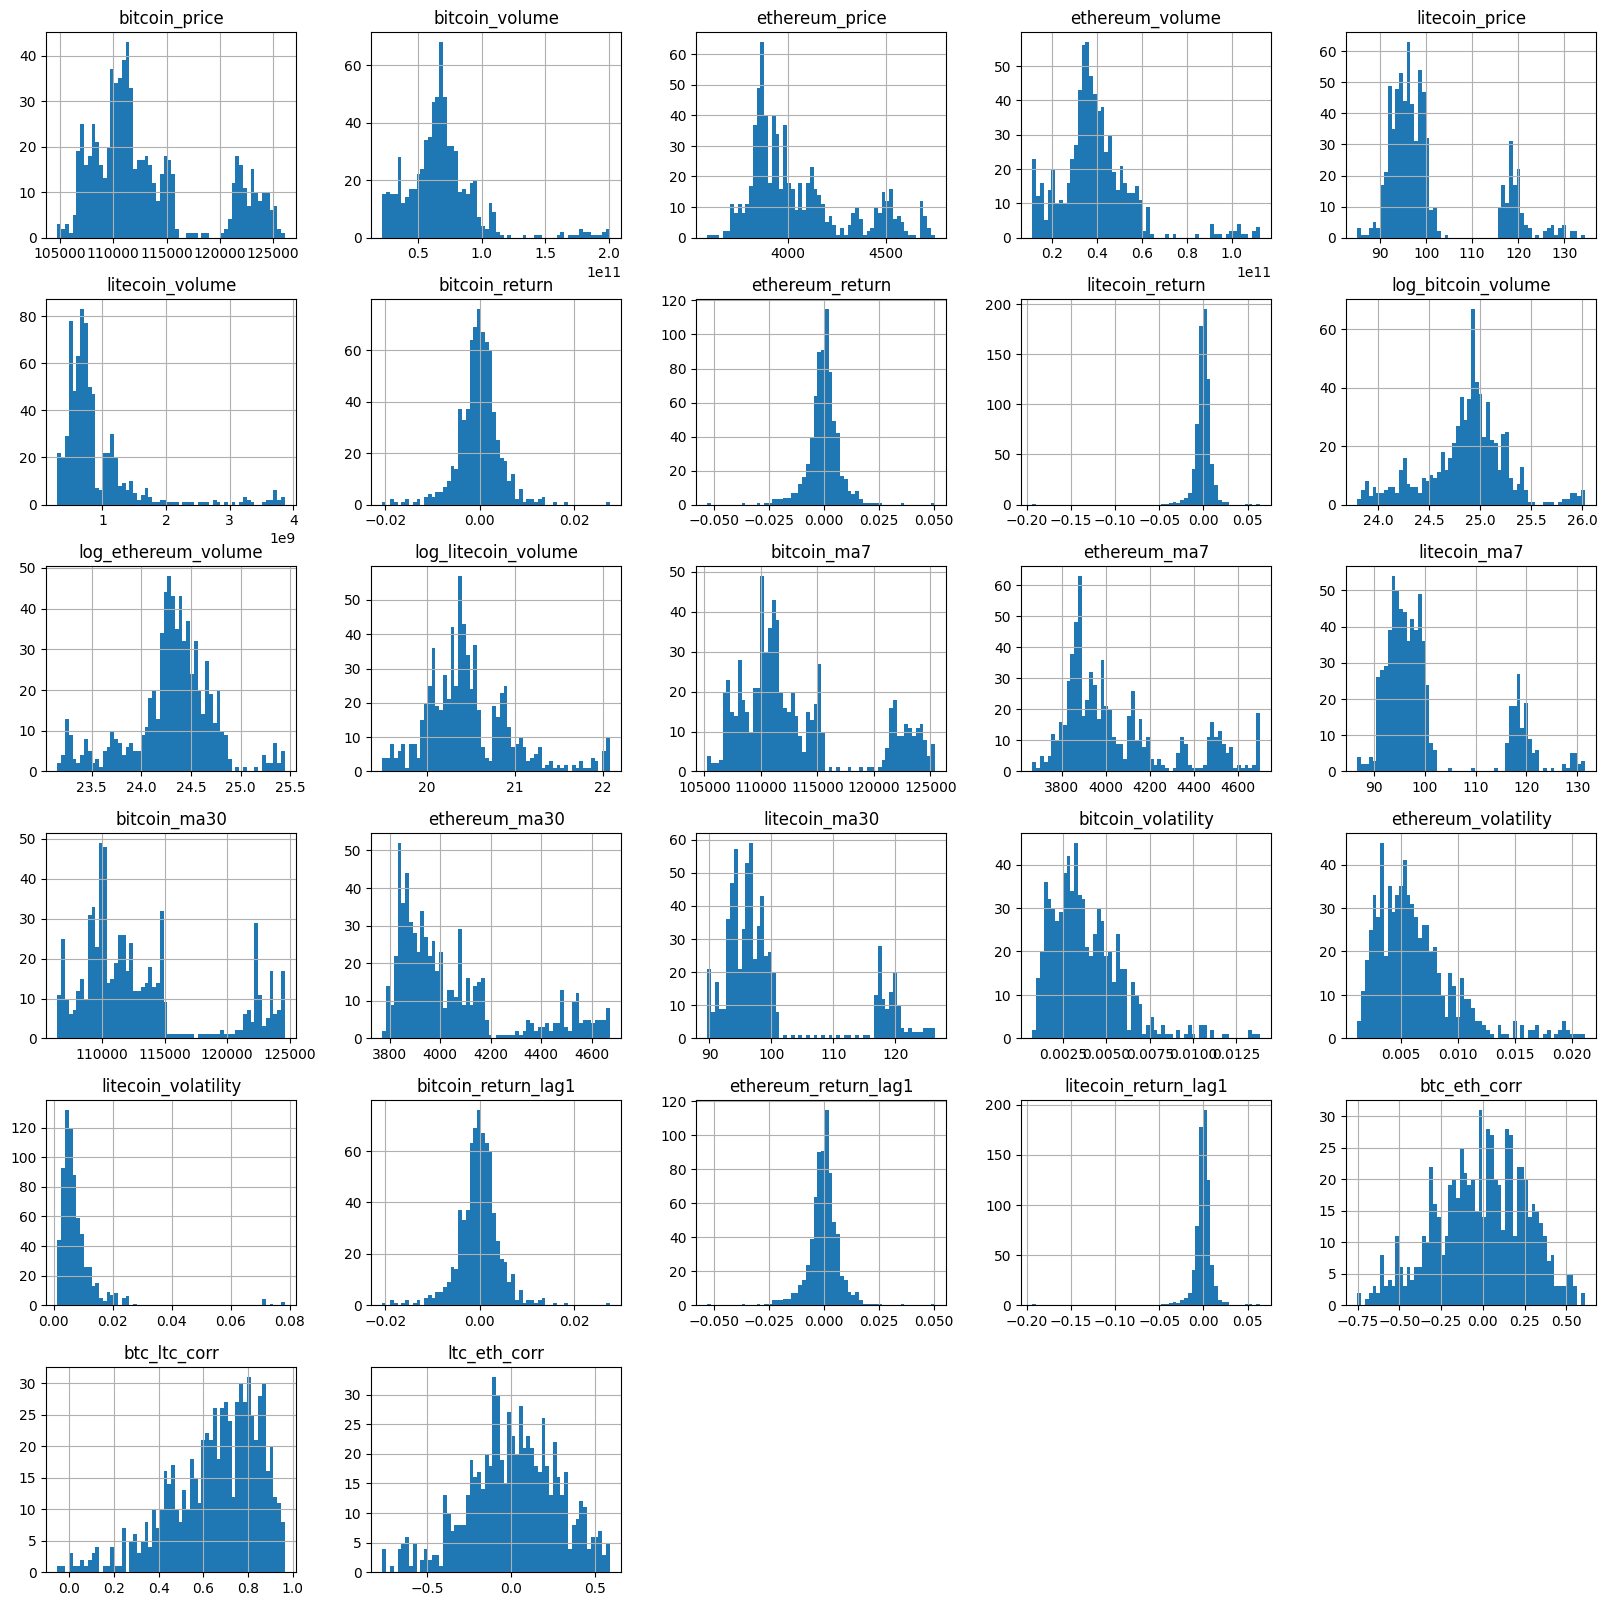

In [58]:
df.hist(bins=60, figsize=(20,20))

In [60]:
df.isnull().sum()
df = df.fillna(method='ffill').dropna()


/var/folders/zd/lb23py7516dds983dt45vj3c0000gn/T/ipykernel_937/2585049611.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').dropna()


In [61]:
df

,bitcoin_price,bitcoin_volume,ethereum_price,ethereum_volume,litecoin_price,litecoin_volume,bitcoin_return,ethereum_return,litecoin_return,log_bitcoin_volume,...,litecoin_ma30,bitcoin_volatility,ethereum_volatility,litecoin_volatility,bitcoin_return_lag1,ethereum_return_lag1,litecoin_return_lag1,btc_eth_corr,btc_ltc_corr,ltc_eth_corr
29,123382.851588,7.569407e+10,4515.321392,4.035549e+10,118.409513,8.335199e+08,-0.000999,0.001138,-0.003684,25.049966,...,120.261796,0.002440,0.003380,0.003520,0.002809,0.000736,0.002037,-0.507263,0.615429,-0.657491
30,124035.450553,7.733435e+10,4499.431160,4.185803e+10,119.216230,8.106168e+08,0.005289,-0.003519,0.006813,25.071404,...,120.271269,0.002998,0.003526,0.004631,-0.000999,0.001138,-0.003684,-0.512287,0.740647,-0.669303
31,124061.617924,7.261375e+10,4529.113594,4.264672e+10,120.243973,8.350753e+08,0.000211,0.006597,0.008621,25.008420,...,120.309772,0.002336,0.004290,0.004800,0.005289,-0.003519,0.006813,-0.389436,0.598545,-0.116372
32,123952.578118,7.018978e+10,4538.086989,4.102785e+10,120.939214,7.981585e+08,-0.000879,0.001981,0.005782,24.974469,...,120.358471,0.002492,0.003046,0.004985,0.000211,0.006597,0.008621,-0.457229,0.540916,0.013353
33,123526.924062,6.325082e+10,4534.914067,3.807779e+10,119.870968,7.624602e+08,-0.003434,-0.000699,-0.008833,24.870374,...,120.353469,0.002985,0.003051,0.006245,-0.000879,0.001981,0.005782,-0.393948,0.623128,0.040820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,105802.323890,5.683415e+10,3727.707381,3.319158e+10,87.848051,7.845721e+08,-0.020622,0.001469,-0.045432,24.763403,...,96.027523,0.008513,0.002332,0.016723,0.000339,0.002389,-0.000115,-0.011431,0.940150,-0.058398
717,106575.486921,6.241378e+10,3591.421883,3.823790e+10,88.386341,8.424765e+08,0.007308,-0.036560,0.006128,24.857052,...,95.641505,0.009190,0.014274,0.017604,-0.020622,0.001469,-0.045432,-0.347040,0.943844,-0.261368
718,107516.838811,6.618836e+10,3613.385942,4.044882e+10,89.652859,8.737397e+08,0.008833,0.006116,0.014329,24.915770,...,95.269731,0.009876,0.014847,0.019307,0.007308,-0.036560,0.006128,-0.256047,0.949866,-0.193130
719,106990.156886,6.888377e+10,3669.935936,4.276136e+10,88.795291,8.643223e+08,-0.004899,0.015650,-0.009565,24.955686,...,94.882470,0.009802,0.016489,0.019429,0.008833,0.006116,0.014329,-0.324359,0.951996,-0.206505


In [62]:
df.to_csv("clean_dataset.csv", index=False)